# Project 2: Ames Housing Kaggle Challenge

## Problem Statement

Our company was engagedby Real Estate company to conduct research and study on real estate opportunities in Iowa. 

* To analyse the Ames Housing dataset from the Ames Accessor's Office containing information of residential properties sold in Ames (Iowa) from 2006 to 2010
* To develop a regression model to predict the sale price of houses
* To provide recommendation with insights for homeowners on what home improvement which will improve housing price

## Executive Summary
### Contents
* Data Cleaning workbook (EDA)
* Modelling workbook with conclusion (Modelling , Regression, Conclusion and Recommendation)

### Process

1. Understand the data, outputting a map in variables.csv
2. identify outliers and Null values
3. Categorise them to their data type based on data dictionary
4. Feature engineering
5. one hot encode for nominal data
6. Save them into csv

## EDA

### Importing Libraries

In [1]:
# import libraries

#maths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport as pp
import seaborn as sns
from scipy.stats import kurtosis, skew


sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, RidgeCV

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# changing pandas' option to display all columns
pd.set_option('display.max_columns', 999)

In [3]:
# load data set

df_train = pd.read_csv('../datasets/train.csv')

df_test = pd.read_csv('../datasets/test.csv')

In [4]:
#examine the shape
print("train set shape:{}".format(df_train.shape))
print("test set shape:{}".format(df_test.shape))

train set shape:(2051, 81)
test set shape:(879, 80)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
df_train.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [7]:
print(df_train.columns)


Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

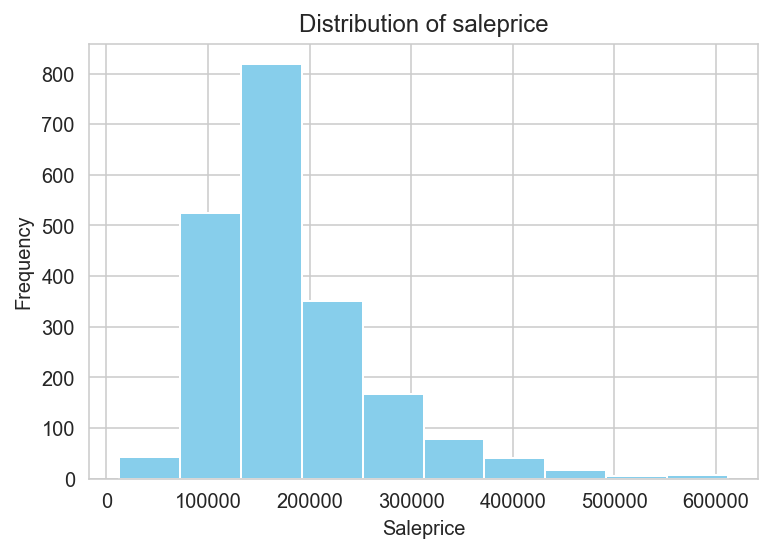

In [8]:
#overview of distribution of saleprice in the train dataset
plt.hist(df_train['SalePrice'],color='skyblue')
plt.xlabel('Saleprice')
plt.ylabel('Frequency')
plt.title('Distribution of saleprice');

In [9]:
#check the sknewness, this shows that it is skewed
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df_train['SalePrice']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df_train['SalePrice']) ))

excess kurtosis of normal distribution (should be 0): 3.5673603426667766
skewness of normal distribution (should be 0): 1.5564120909746169


The saleprice seems to be positively skewed, we can explore further by log the target variable

In [10]:
#rename column to lowercase, removing spaces
df_train.rename(columns= lambda x: x.strip().lower().replace(' ','_'),inplace=True)
df_test.rename(columns= lambda x: x.strip().lower().replace(' ','_'),inplace=True) 

#### Examining the dataset for null values

In [11]:
#check for nulls in columns
null_df = df_train.columns[df_train.isnull().any()]
num = df_train[null_df].isnull().sum()
null_list= round(num/df_train.shape[0],3).sort_values(ascending=False)


In [12]:
#review the list to identify highest null percent of null
null_list

pool_qc           0.996
misc_feature      0.968
alley             0.932
fence             0.805
fireplace_qu      0.488
lot_frontage      0.161
garage_yr_blt     0.056
garage_cond       0.056
garage_qual       0.056
garage_finish     0.056
garage_type       0.055
bsmt_exposure     0.028
bsmtfin_type_2    0.027
bsmt_cond         0.027
bsmt_qual         0.027
bsmtfin_type_1    0.027
mas_vnr_type      0.011
mas_vnr_area      0.011
bsmt_half_bath    0.001
bsmt_full_bath    0.001
garage_cars       0.000
bsmtfin_sf_1      0.000
bsmtfin_sf_2      0.000
bsmt_unf_sf       0.000
garage_area       0.000
total_bsmt_sf     0.000
dtype: float64

In [13]:
null_df = df_test.columns[df_test.isnull().any()]
num = df_test[null_df].isnull().sum()
null_list= round(num/df_test.shape[0],3).sort_values(ascending=False)

In [14]:
#review the list to identify highest null percent of null
null_list

pool_qc           0.995
misc_feature      0.953
alley             0.934
fence             0.804
fireplace_qu      0.480
lot_frontage      0.182
garage_yr_blt     0.051
garage_finish     0.051
garage_qual       0.051
garage_cond       0.051
garage_type       0.050
bsmtfin_type_2    0.028
bsmtfin_type_1    0.028
bsmt_exposure     0.028
bsmt_cond         0.028
bsmt_qual         0.028
mas_vnr_area      0.001
mas_vnr_type      0.001
electrical        0.001
dtype: float64

Referencing the data dictionary, most of the NaN values seem to actually have a meaning, i.e. that the property does not have the feature. Therefore it makes more sense to treat NaN as valid observations and keep them. The NaN cells should be imputed case by case, based on the context of that feature.

Also keep in mind that we may want to remove the top 4 features that have >95% of values as NaN: pool_qc, misc_feature, alley, fence

#### Visualise the correlation between the numberical features and target variable 

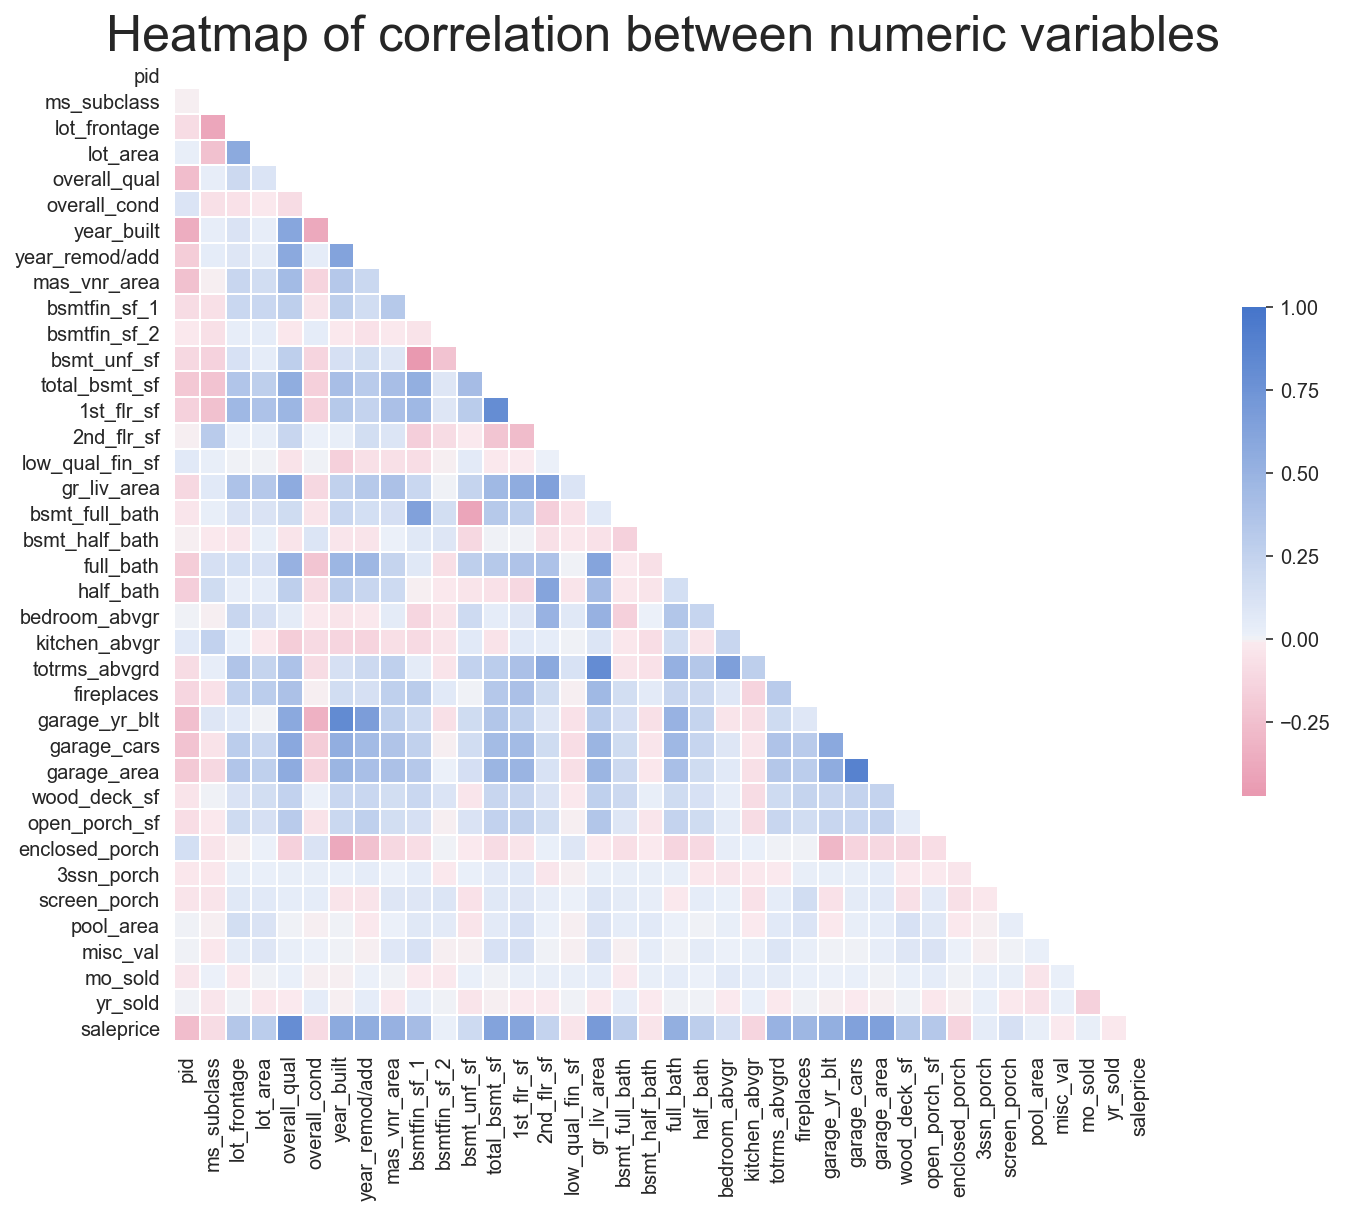

In [15]:
var =[x for x in df_train.columns if x not in ['id']]

#compute correlation matrix
corr= df_train[var].corr()

#generate mask
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#setup matplotlib figure
f,ax= plt.subplots(figsize=(16,9))

cmap=sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

sns.heatmap(corr,mask=mask, cmap=cmap, center=0, square=True, linewidth=.5,cbar_kws={"shrink":.5})
ax.set_title("Heatmap of correlation between numeric variables", fontsize=25);


This heatmap and correlation matrices allows us to understand the correlation between numeric features and saleprice, and we will have to make sure that we do not unnecessarily remove features. The below correlation chart identifies that overall quality and a few other factors which are highly correlated and we would need to bear in mind when we clean and model.

In [16]:
train_corr= corr.sort_values(['saleprice'],ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(train_corr[['saleprice']],vmin=-1,cmap='coolwarm',annot=True)
plt.title('Correlation between numeric features and saleprice',fontsize=25);
print('I would consider taking 0.4 as a benchmark of treshold to consider numerical variables which I want to drop.')

I would consider taking 0.4 as a benchmark of treshold to consider numerical variables which I want to drop.


#### Visualising  numerical data

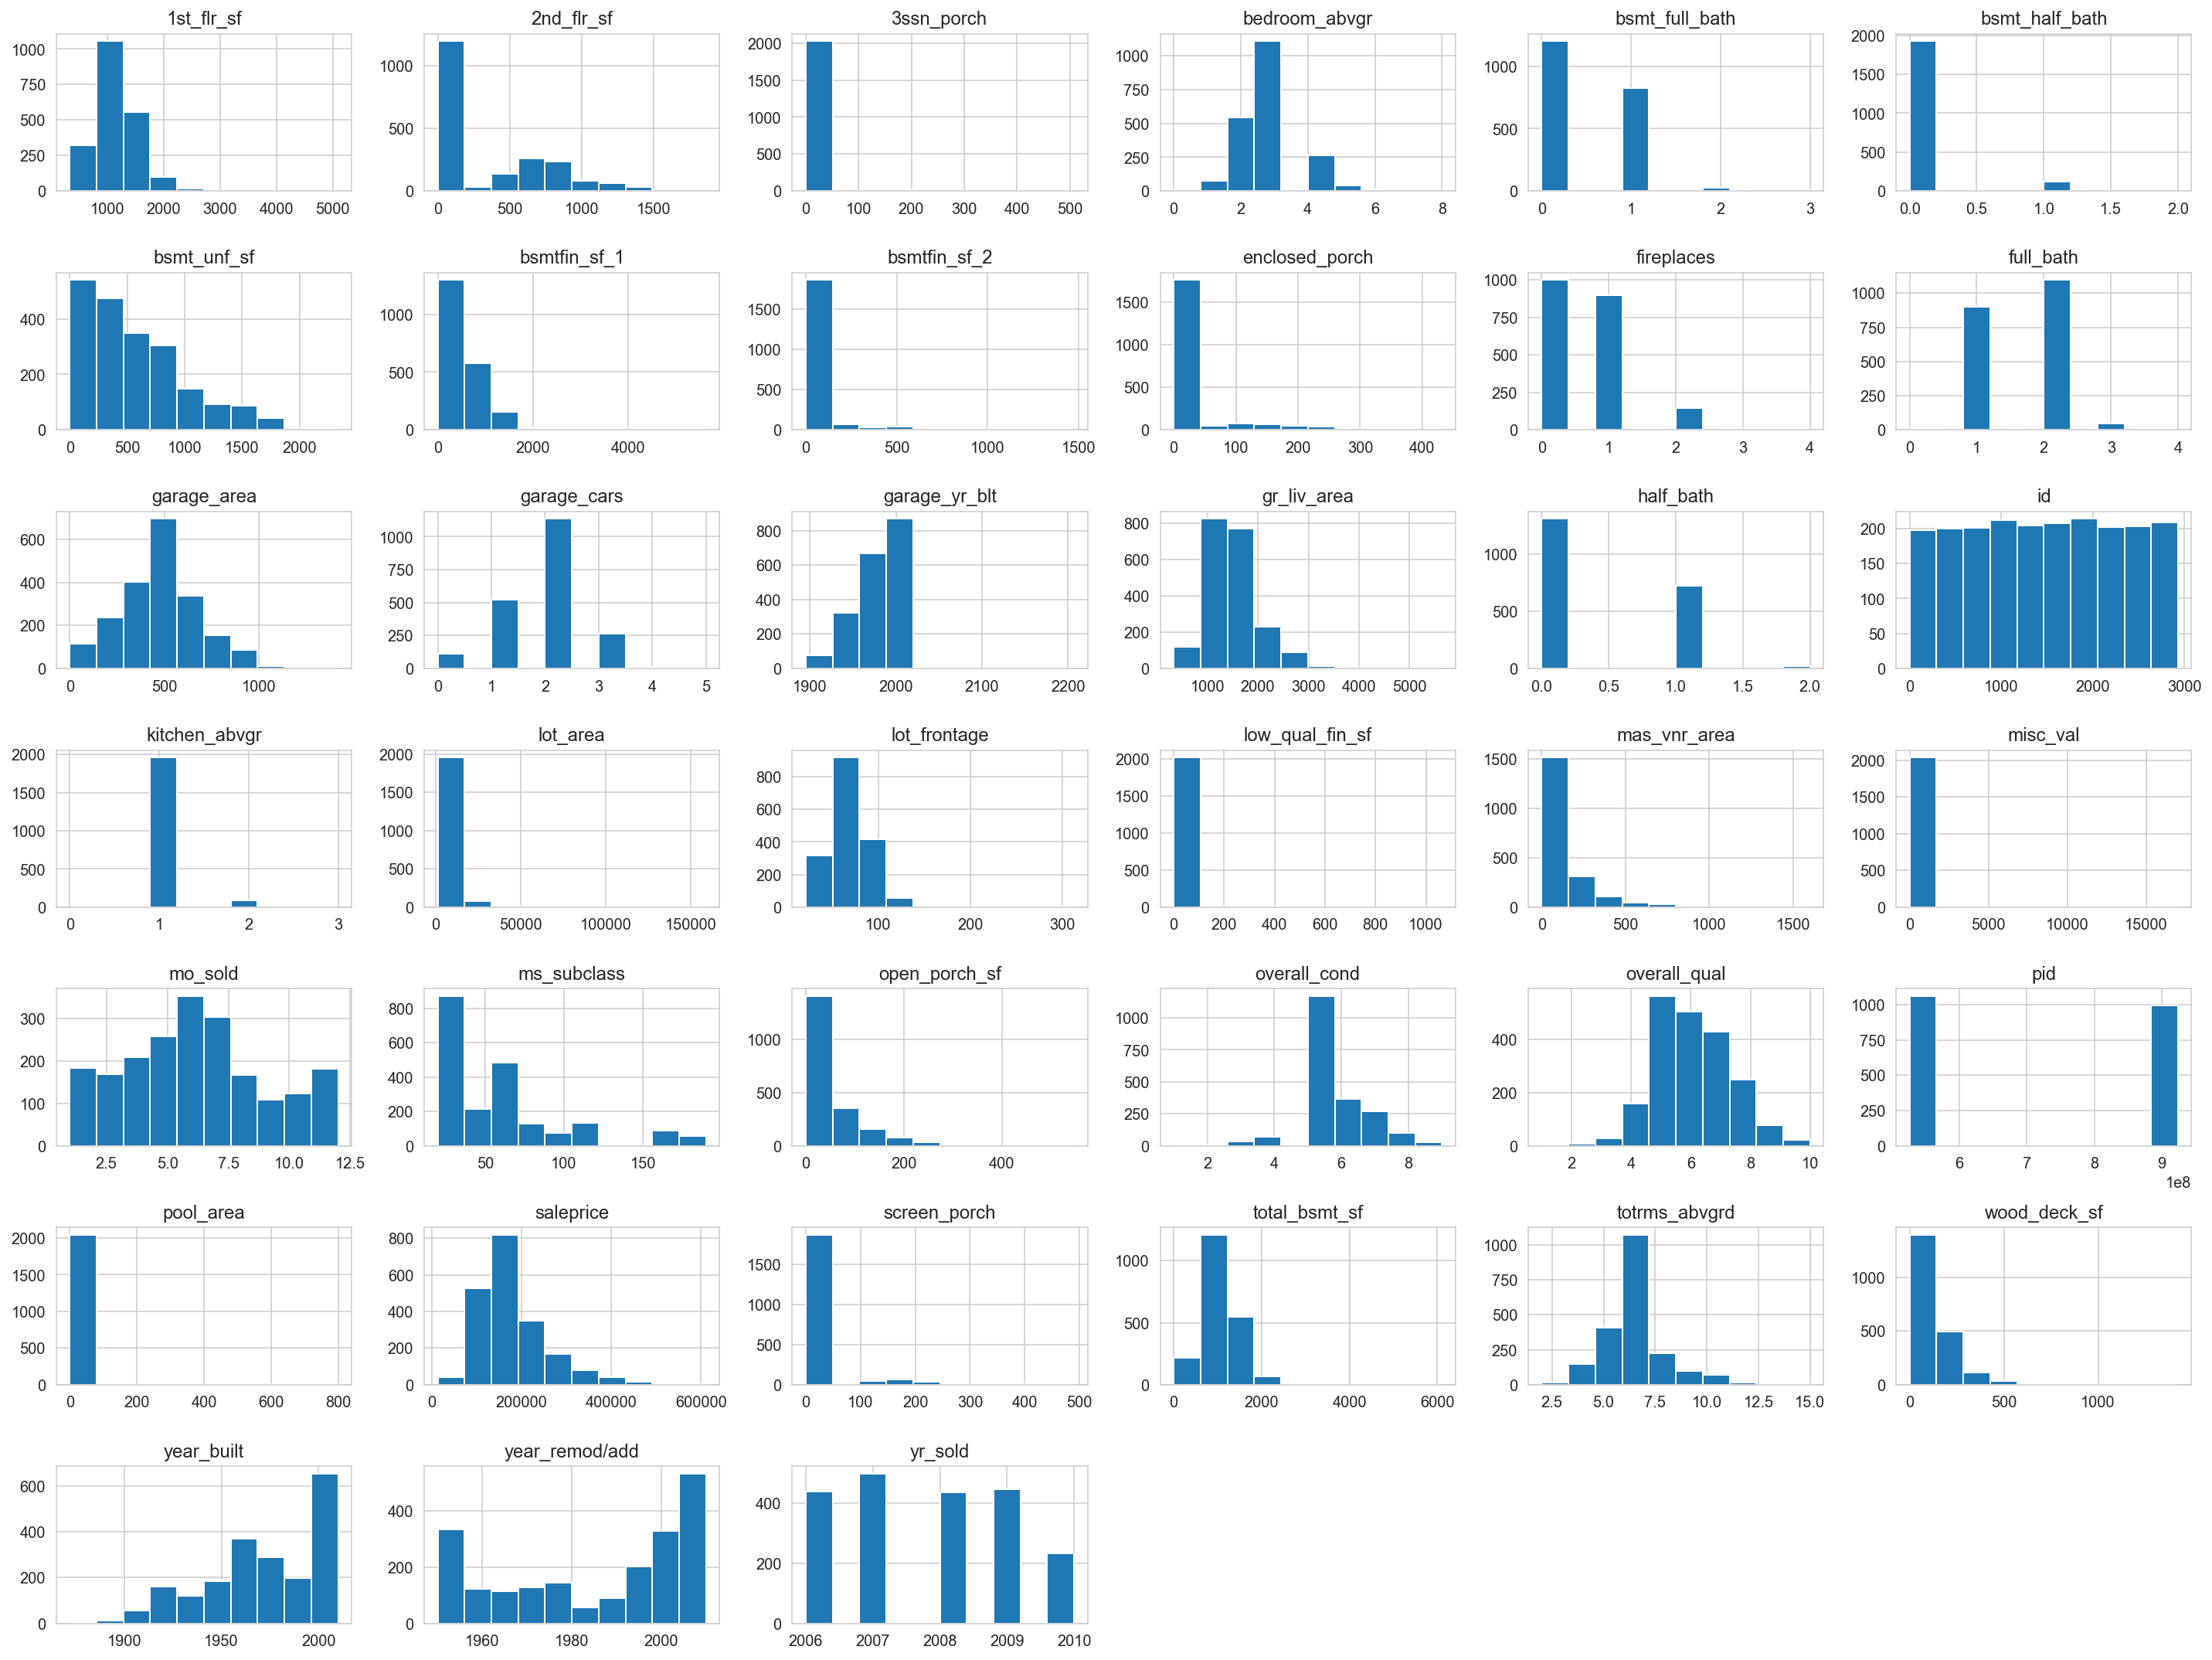

In [17]:
num_col=df_train._get_numeric_data().columns.tolist()
df_train[num_col].hist(figsize=(20,15))
plt.tight_layout()
plt.show();

#### Note from numeric data
* sale price seems to be skewed, it might follow a log-normal distribution
* The month sold (Mo sold) seemed to have a spike in month of June (6)
* It seems to indicate that there are possible of missing values concluding with what we see above


# Data preparation
Reviewing of data ( Info given from data dict)

Based on the data dictionary, I have summarise the below.

* Alley : data description says NA means "no alley access"
* MasVnrType : NA most likely means no veneer*
* BsmtQual etc : data description says NA for basement features is "no basement"
* FireplaceQu : data description says NA means "no fireplace"
* GarageType etc : data description says NA for garage features is "no garage"
* PoolQC : data description says NA means "no pool"
* Fence : data description says NA means "no fence"
* MiscFeature : data description says NA means "no misc feature"


In [18]:
#impute nan/empty cells with None

cols=['alley','mas_vnr_type','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','fireplace_qu',
      'garage_type','garage_finish','garage_qual','garage_cond','pool_qc','fence','misc_feature']
for col in cols:
    df_train[col]=df_train[col].fillna(value='None')
    df_test[col]=df_test[col].fillna(value='None')

In [19]:
#impute nan/empty cells with 0

cols =['mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath',
       'garage_yr_blt','garage_cars','garage_area']
for col in cols:
    df_train[col]=df_train[col].fillna(value=0)
    df_test[col]=df_test[col].fillna(value=0)

In [20]:
# LotFrontage : group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# since lot frontage mentions that its the linear feet of street connected to property, i will associate it neighborhood and take the median of the same neighborhood
cols=['lot_frontage']
for col in cols:
    df_train[col]=df_train.groupby("neighborhood")["lot_frontage"].transform(lambda x: x.fillna(x.median()))
    df_test[col]=df_test.groupby("neighborhood")["lot_frontage"].transform(lambda x: x.fillna(x.median()))

In [21]:
# there are 3 observations which are zero after imputing
nan_colnames_new1 = pd.DataFrame(df_train.isnull().sum(),columns = ['count'])
nan_colnames_new1 = nan_colnames_new1[nan_colnames_new1['count'] > 0]
nan_colnames_new1

count
lot_frontage      3

In [22]:
# Replace the Lot Frontage of remaining 3 observations with zero. 
#As there is no neighbourhood data available for reference and since the percentage is small.
df_train["lot_frontage"] =df_train["lot_frontage"].fillna(0)


In [23]:
# There is a one ordinal variable in the test set which is null and i have impute them with the mode
nan_colnames_new2 = pd.DataFrame(df_test.isnull().sum(),columns = ['count'])
nan_colnames_new2 = nan_colnames_new2[nan_colnames_new2['count'] > 0]
nan_colnames_new2

count
electrical      1

In [24]:
df_test['electrical']=df_test['electrical'].fillna(df_test['electrical'].mode()[0])

 it is quite obvious gr_liv_area >4000 is not consistent


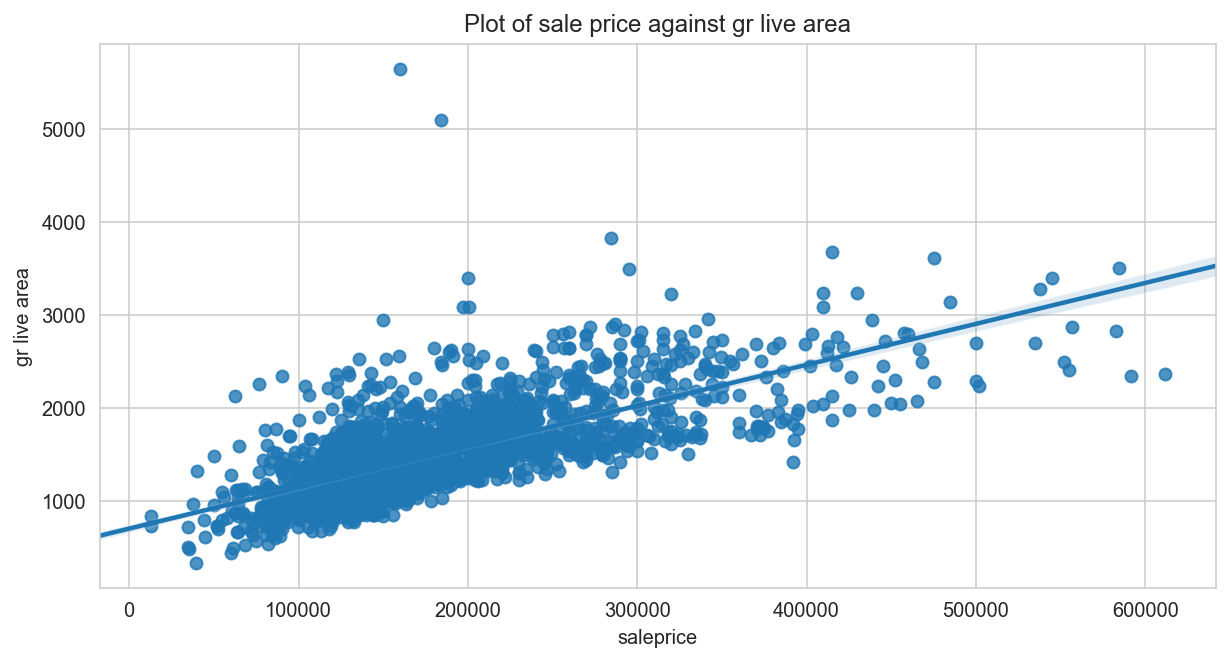

In [25]:
### review of saleprice against gr_live_area
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x = df_train['saleprice'], y = df_train['gr_liv_area'],ax=ax)
ax.set(
        xlabel='saleprice',
        ylabel='gr live area',
        title='Plot of sale price against gr live area');
print(" it is quite obvious gr_liv_area >4000 is not consistent")

### Removing data and outliers from  notes

**Drop the 'PID' column as they are not useful for our analysis. I will keep 'Id' column as this is the identifier required for kaggle score calculation**

>As a general guideline, i have set the 60% threshold. Any columns which has more than 60% variance, i will drop them

In [26]:
df_train.drop(['pid'],axis=1,inplace=True)
df_test.drop(['pid'],axis=1,inplace=True)

<b> For Gr Liv Area</b>

In [27]:
#df_train to remove outlier, recommended by txt to remove house>4000 sqft
print('before:%s'%len(df_train))
mask_area= df_train['gr_liv_area']>4000
df_train= df_train[~mask_area]
print('after:%s'%len(df_train))

before:2051
after:2049


> ***2 outliers were removed***

**Performing Sanity check for other variables which may error data**

In [28]:
#find out which column contain year or month
#sanity check for columns for year and month
col=['month','mo','year','yr']
list_to_check=[]
for name in col:
    check=df_train.filter(regex=name).columns.values.tolist()
    list_to_check.append(check)
    print(list_to_check)

[[]]
[[], ['year_remod/add', 'mo_sold']]
[[], ['year_remod/add', 'mo_sold'], ['year_built', 'year_remod/add']]
[[], ['year_remod/add', 'mo_sold'], ['year_built', 'year_remod/add'], ['garage_yr_blt', 'yr_sold']]


**Year build and year remod/add**

I have checked year_remod/add and build together since they are related. Year remod/add cannot preceed year built.
It was identified in train dataset there is an error, it does not make sense that year built comes after year remod

In [29]:

year=(df_train['year_remod/add'] - df_train['year_built'] <0)
drop_row=df_train[year][['year_remod/add','year_built']]
row_index=drop_row
row_index


year_remod/add  year_built
1003            2001        2002

> We would need to remove index 1003 in train

In [30]:
print(df_train.shape)
df_train.drop(index=row_index.index[0],inplace=True)
print(df_train.shape)

(2049, 80)
(2048, 80)


In [31]:
#check on test set
year=(df_test['year_remod/add'] - df_test['year_built'] <0)
print(df_test[year].empty)
#there is no error in data set

True


In [32]:
#garage year built
df_train['garage_yr_blt'].astype('int64').describe()
#maximum umber of year is not possible


count    2048.000000
mean     1868.524902
std       454.435869
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

In [33]:
#find out the entry, it may be an errror
df_train['garage_yr_blt']=df_train['garage_yr_blt'].astype('int64')
mask=df_train['garage_yr_blt']>2010
row_index2=df_train[mask]['garage_yr_blt']

In [34]:
# i would perceive it as a typo and eliminate this row to be consistent or check with user. 
#it is not possible for a garage to be build in year 2207
df_train.drop(index=row_index2.index[0],inplace=True)

In [35]:
#validate the shape
df_train.shape

(2047, 80)

In [36]:
#check on test dataset
df_test['garage_yr_blt']=df_test['garage_yr_blt'].astype('int64')
mask=df_test['garage_yr_blt']>2010
row_index3=df_test[mask]['garage_yr_blt']
x=row_index3.empty
print(x)
#not in test dataset

True


In [37]:
#month sold
df_train['mo_sold'].describe()
#no abnormal results

count    2047.000000
mean        6.220322
std         2.742593
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: mo_sold, dtype: float64

In [38]:
df_test['mo_sold'].describe()
#no abnormal results

count    879.000000
mean       6.207053
std        2.644097
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: mo_sold, dtype: float64

In [39]:
#sanity check on current shape
print("Test:{}".format(df_test.shape))
print("Train:{}".format(df_train.shape))


Test:(879, 79)
Train:(2047, 80)


In [40]:
def scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None,size=None):    
        
    plt.figure(figsize=(15,12))
    
    palette = sns.color_palette("bright",n_colors=16)
      
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette,size=size,sizes=(10, 200))

    plt.title(title,fontsize=25)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.tick_params(labelsize=15)

In [41]:
def boxplot(data,x,y,title=''):
    
    plt.figure(figsize=(15,12))
    
    b = sns.boxplot(data=data,x=x,y=y)
    b.axes.set_title(title,fontsize=25)
    b.set_xlabel(x,fontsize=15)
    b.set_ylabel(y,fontsize=15)
    b.tick_params(labelsize=15)

In [42]:
#df_train.over_qual.dtypes

>I am interested to understand if there is any realtionship on year built against sale price of housing. 

Higher sale prices were recorded for houses built after year 2000.


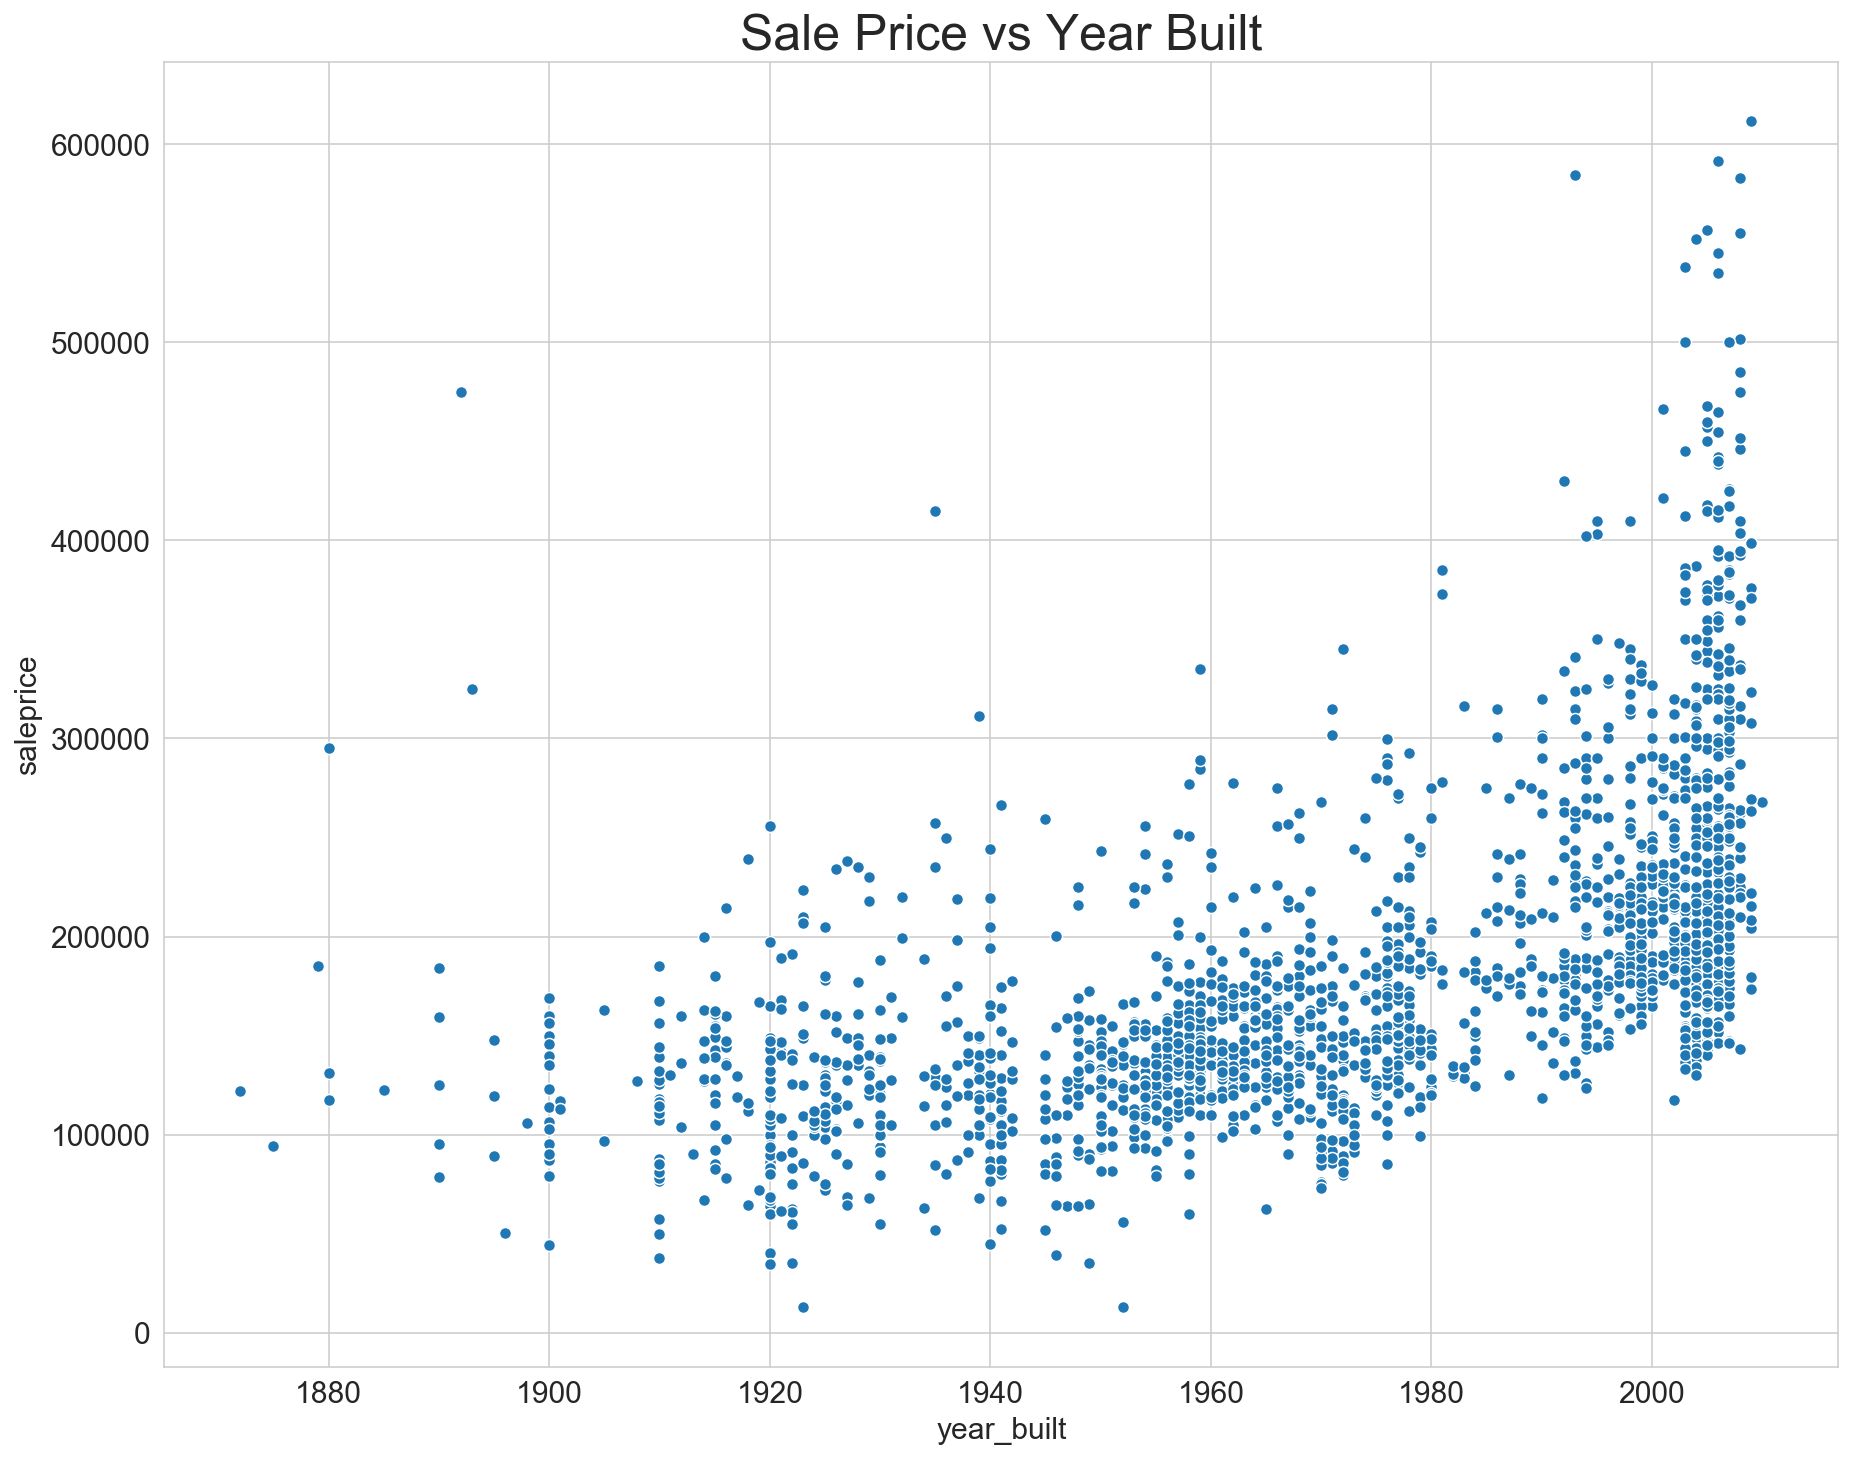

In [43]:
scatterplot('Sale Price vs Year Built',df_train,x='year_built',y='saleprice')
plt.savefig('../image/salepricevsbuild.png');

print('Higher sale prices were recorded for houses built after year 2000.')

In [44]:
scatterplot('Sale Price vs Gr Liv Area',df_train,x='gr_liv_area',y='saleprice',hue='ms_subclass')
plt.savefig('../image/gr_live_areavssaleprice.png');

print('This plot shows the variation between living area square feet with each dwelling and the saleprice.')
print('In general, it is noted that the 020 (1- Story 1946 and newer style and greater living area fetch a better saleprice)')


This plot shows the variation between living area square feet with each dwelling and the saleprice.
In general, it is noted that the 020 (1- Story 1946 and newer style and greater living area fetch a better saleprice)


In [45]:
boxplot(df_train,x='saleprice',y='neighborhood',title='Plot of neighbourhood against saleprice')
plt.savefig('../image/neighborhood.png')
print('I am intersted to understand the relationship between housing estate in neighborhood against the sale price.')
print('Most neighbourhoods have sale price between 100K to 250K')
print('Stone Brook and Northridge Heights  have the highest sale prices.')

I am intersted to understand the relationship between housing estate in neighborhood against the sale price.
Most neighbourhoods have sale price between 100K to 250K
Stone Brook and Northridge Heights  have the highest sale prices.


**Convert the nominal columns to categorical type, if they are currently in numeric form.**


In [46]:
# Change MSSubClass to the building class
df_train['ms_subclass'] = df_train['ms_subclass'].apply(str)
df_test['ms_subclass'] = df_test['ms_subclass'].apply(str)

# Transform the month sold into categorical features. 
# I don't transform the year as it could be a direct representation of the recency of property 

df_train['mo_sold'] = df_train['mo_sold'].astype(str)
df_test['mo_sold'] = df_test['mo_sold'].astype(str)

**Convert the categorical columns to numeric if they are ordinal in nature.**


In [47]:
df_train=df_train.replace({"street" : {"Grvl" : 1, "Pave" : 2},
                             "alley" : {"Grvl" : 1, "Pave" : 2},
                             "lot_shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                             "utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                             "land_slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                             "exter_qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                              "fireplace_qu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "garage_finish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                             "garage_cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "garage_qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "paved_drive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "pool_qc" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                                                      "exter_cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "bsmt_qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "bsmt_cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "bsmt_exposure" : {"None" : 0, "No" : 1, "Mn": 1, "Av" : 2, "Gd": 3},
                             "bsmtfin_type_1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                             "bsmtfin_type_2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                             "heating_qc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "kitchen_qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8}
                          
                            }
                     )

In [48]:
df_test=df_test.replace({"street" : {"Grvl" : 1, "Pave" : 2},
                             "alley" : {"Grvl" : 1, "Pave" : 2},
                             "lot_shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                             "utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                             "land_slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                             "exter_qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "exter_cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                            "fireplace_qu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "garage_finish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                             "garage_cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "garage_qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "paved_drive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "pool_qc" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                             "bsmt_qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "bsmt_cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "bsmt_exposure" : {"None" : 0, "No" : 1, "Mn": 1, "Av" : 2, "Gd": 3},
                             "bsmtfin_type_1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                             "bsmtfin_type_2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                             "heating_qc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "kitchen_qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8}
                          
                            }
                     )

**Convert columns to numeric**


In [49]:

df_train['garage_yr_blt'] = df_train['garage_yr_blt'].astype(str).str.extract('(^\d+)', expand=True)
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].astype(str).str.extract('(^\d+)', expand=True)


In [50]:
df_train['garage_yr_blt'] = df_train['garage_yr_blt'].astype(int)
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].astype(int)


In [51]:
df_train['total_bsmt_sf']=df_train['total_bsmt_sf'].astype(int)
df_test['total_bsmt_sf']=df_test['total_bsmt_sf'].astype(int)

In [52]:
#col=['bsmtfin_sf_1', 'bsmtfin_sf_2','bsmt_unf_sf']
df_train['bsmtfin_sf_2']=df_train['bsmtfin_sf_2'].astype(float)
df_test['bsmtfin_sf_2']=df_test['bsmtfin_sf_2'].astype(float)

In [53]:
df_train['bsmtfin_sf_1']=df_train['bsmtfin_sf_1'].astype(float)
df_test['bsmtfin_sf_1']=df_test['bsmtfin_sf_1'].astype(float)

In [54]:
df_train['bsmt_unf_sf']=df_train['bsmt_unf_sf'].astype(float)
df_test['bsmt_unf_sf']=df_test['bsmt_unf_sf'].astype(float)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2050
Data columns (total 80 columns):
id                 2047 non-null int64
ms_subclass        2047 non-null object
ms_zoning          2047 non-null object
lot_frontage       2047 non-null float64
lot_area           2047 non-null int64
street             2047 non-null int64
alley              2047 non-null object
lot_shape          2047 non-null int64
land_contour       2047 non-null object
utilities          2047 non-null int64
lot_config         2047 non-null object
land_slope         2047 non-null int64
neighborhood       2047 non-null object
condition_1        2047 non-null object
condition_2        2047 non-null object
bldg_type          2047 non-null object
house_style        2047 non-null object
overall_qual       2047 non-null int64
overall_cond       2047 non-null int64
year_built         2047 non-null int64
year_remod/add     2047 non-null int64
roof_style         2047 non-null object
roof_matl          204

## Feature Engineering

**Sum sf variable to get total sqfootage feature**


In [56]:
#check the datatpype
col=['total_bsmt_sf','1st_flr_sf','2nd_flr_sf']
for cl in col:
    print(df_train[cl].dtypes)

int64
int64
int64


In [57]:
#check the datatpype

col=['total_bsmt_sf','1st_flr_sf','2nd_flr_sf']
for cl in col:
    print(df_test[cl].dtypes)

int64
int64
int64


In [58]:
#combining features of surface area

df_train['total_sf'] = df_train['total_bsmt_sf'].astype('int64') + df_train['1st_flr_sf'] + df_train['2nd_flr_sf']
df_test['total_sf'] = df_test['total_bsmt_sf'] + df_test['1st_flr_sf'] + df_test['2nd_flr_sf']



In [59]:
print(df_train.shape)
print(df_test.shape)

(2047, 81)
(879, 80)


In [60]:
#combining features of  bathroom and otudoor area
df=[df_train,df_test]
for all_df in df:
    all_df['total_baths'] = all_df['bsmt_full_bath'].astype(int) + 0.5*all_df['bsmt_half_bath'].astype(int) + all_df['full_bath'] + 0.5*all_df['half_bath']
    all_df['total_outdoor'] = all_df['wood_deck_sf'] + all_df['enclosed_porch'] + all_df['3ssn_porch'] + all_df['open_porch_sf'] + all_df['screen_porch']

In [61]:
#dropping features 
df=[df_train,df_test]
for dropcol in df:
    dropcol.drop(['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
             'wood_deck_sf', 'enclosed_porch', '3ssn_porch', 'open_porch_sf', 'screen_porch'], 
            axis=1, inplace=True)

In [62]:
print(df_train.shape)
print(df_test.shape)

(2047, 74)
(879, 73)


**Variable: Fireplaces**

In [63]:
print('---Train set---')

print(df_train.fireplaces.value_counts())


---Train set---
0    999
1    897
2    145
3      5
4      1
Name: fireplaces, dtype: int64


In [64]:
print('---Test set---')

print(df_test.fireplaces.value_counts())


---Test set---
0    422
1    376
2     75
3      6
Name: fireplaces, dtype: int64


In [65]:
# i have changed it to discrete fireplace
df_train['fireplaces'] = df_train['fireplaces'].map({0: 0, 1:1, 2:1, 3:1, 4:1})
df_test['fireplaces'] = df_test['fireplaces'].map({0: 0, 1:1, 2:1, 3:1, 4:1})


In [66]:
print(df_train.shape)
print(df_test.shape)

(2047, 74)
(879, 73)


**Variable: Streets (Pavel/Gravel)**

In [67]:
print('---Train set---')
print(df_train.street.value_counts())

---Train set---
2    2040
1       7
Name: street, dtype: int64


In [68]:
df_test.street.value_counts()

2    874
1      5
Name: street, dtype: int64

The percentage of gravel road is small. I will drop this column

In [69]:
df_train.drop('street', axis=1, inplace=True)
df_test.drop('street', axis=1, inplace=True)


In [70]:
print(df_train.shape)
print(df_test.shape)

(2047, 73)
(879, 72)


**Variable:Pools**

In [71]:
print('---Train set---')

print(df_train.pool_area.value_counts())

---Train set---
0      2039
800       1
738       1
648       1
576       1
561       1
519       1
368       1
228       1
Name: pool_area, dtype: int64


In [72]:
print('---Test set---')

df_test.pool_area.value_counts()

---Test set---


0      875
555      1
512      1
444      1
144      1
Name: pool_area, dtype: int64

The percentage of no pool is great. I will drop these two column remove any inconsistency.

In [73]:
df_train.drop(['pool_area', 'pool_qc'], axis=1, inplace=True)
df_test.drop(['pool_area', 'pool_qc'], axis=1, inplace=True)


In [74]:
print(df_train.shape)
print(df_test.shape)

(2047, 71)
(879, 70)


**Variable:Utilities**

In [75]:
print('---Train set---')
df_train.utilities.value_counts()


---Train set---


4    2045
3       1
2       1
Name: utilities, dtype: int64

In [76]:
print('---Test set---')
print(df_test.utilities.value_counts())

---Test set---
4    878
3      1
Name: utilities, dtype: int64


Since the dataset in utilities are inbalance, I will drop this column due to inconsistency.

In [77]:
df_train.drop('utilities', axis=1, inplace=True)
df_test.drop('utilities', axis=1, inplace=True)


In [78]:
print(df_train.shape)
print(df_test.shape)

(2047, 70)
(879, 69)


**Variable:Misc**

In [79]:
print('---Train set---')
df_train.misc_feature.value_counts()

---Train set---


None    1983
Shed      56
Gar2       4
Othr       3
TenC       1
Name: misc_feature, dtype: int64

In [80]:
print('---Test set---')
df_test.misc_feature.value_counts()

---Test set---


None    838
Shed     39
Othr      1
Gar2      1
Name: misc_feature, dtype: int64

In [81]:
df_train.drop(['misc_feature', 'misc_val'], axis=1, inplace=True)
df_test.drop(['misc_feature', 'misc_val'], axis=1, inplace=True)


Since the dataset in utilities are inbalance , I will drop this column due to inconsistency.

In [82]:
print(df_train.shape)
print(df_test.shape)

(2047, 68)
(879, 67)


**Refactoring variables converting below variables to binary**

In [83]:
#refactoring into binary column and drop the respective columns
all_df=[df_train,df_test]
for df in all_df:
    df['has_masonry'] = np.where(df['mas_vnr_area'] != 0 , 1, 0)
    df['has_2nd_flr'] = np.where(df['2nd_flr_sf'] !=0, 1, 0)
    df['has_garage'] = np.where(df['garage_cars'] !=0, 1, 0)
    df['has_outdoor'] = np.where(df['total_outdoor'] !=0, 1, 0)

In [84]:
df_train.drop(['total_outdoor'], axis=1, inplace=True)
df_test.drop(['total_outdoor'], axis=1, inplace=True)


In [85]:
print(df_train.shape)
print(df_test.shape)

(2047, 71)
(879, 70)


In [86]:
df_train.drop(['2nd_flr_sf'], axis=1, inplace=True)
df_test.drop(['2nd_flr_sf'], axis=1, inplace=True)


In [87]:
print(df_train.shape)
print(df_test.shape)

(2047, 70)
(879, 69)


***Drop mas_vnr_type,mas_vnr_area after combining into binary variable***

In [88]:
df_train.drop(['mas_vnr_type', 'mas_vnr_area'], axis=1, inplace=True)
df_test.drop(['mas_vnr_type', 'mas_vnr_area'], axis=1, inplace=True)


In [89]:
print(df_train.shape)
print(df_test.shape)

(2047, 68)
(879, 67)


In [90]:
garage_vars = [x for x in df_train.columns if 'gar' in x]
garage_vars.remove('has_garage')
df_train.drop(garage_vars, axis=1, inplace=True)


In [91]:
garage_vars = [x for x in df_test.columns if 'gar' in x]
garage_vars.remove('has_garage')
df_test.drop(garage_vars, axis=1, inplace=True)


In [92]:
print(df_train.shape)
print(df_test.shape)

(2047, 61)
(879, 60)


***Generate dummy variable for nominal***

In [93]:
categories = [x for x in df_train.select_dtypes(include='object').columns]

#### Visualising categorical variables

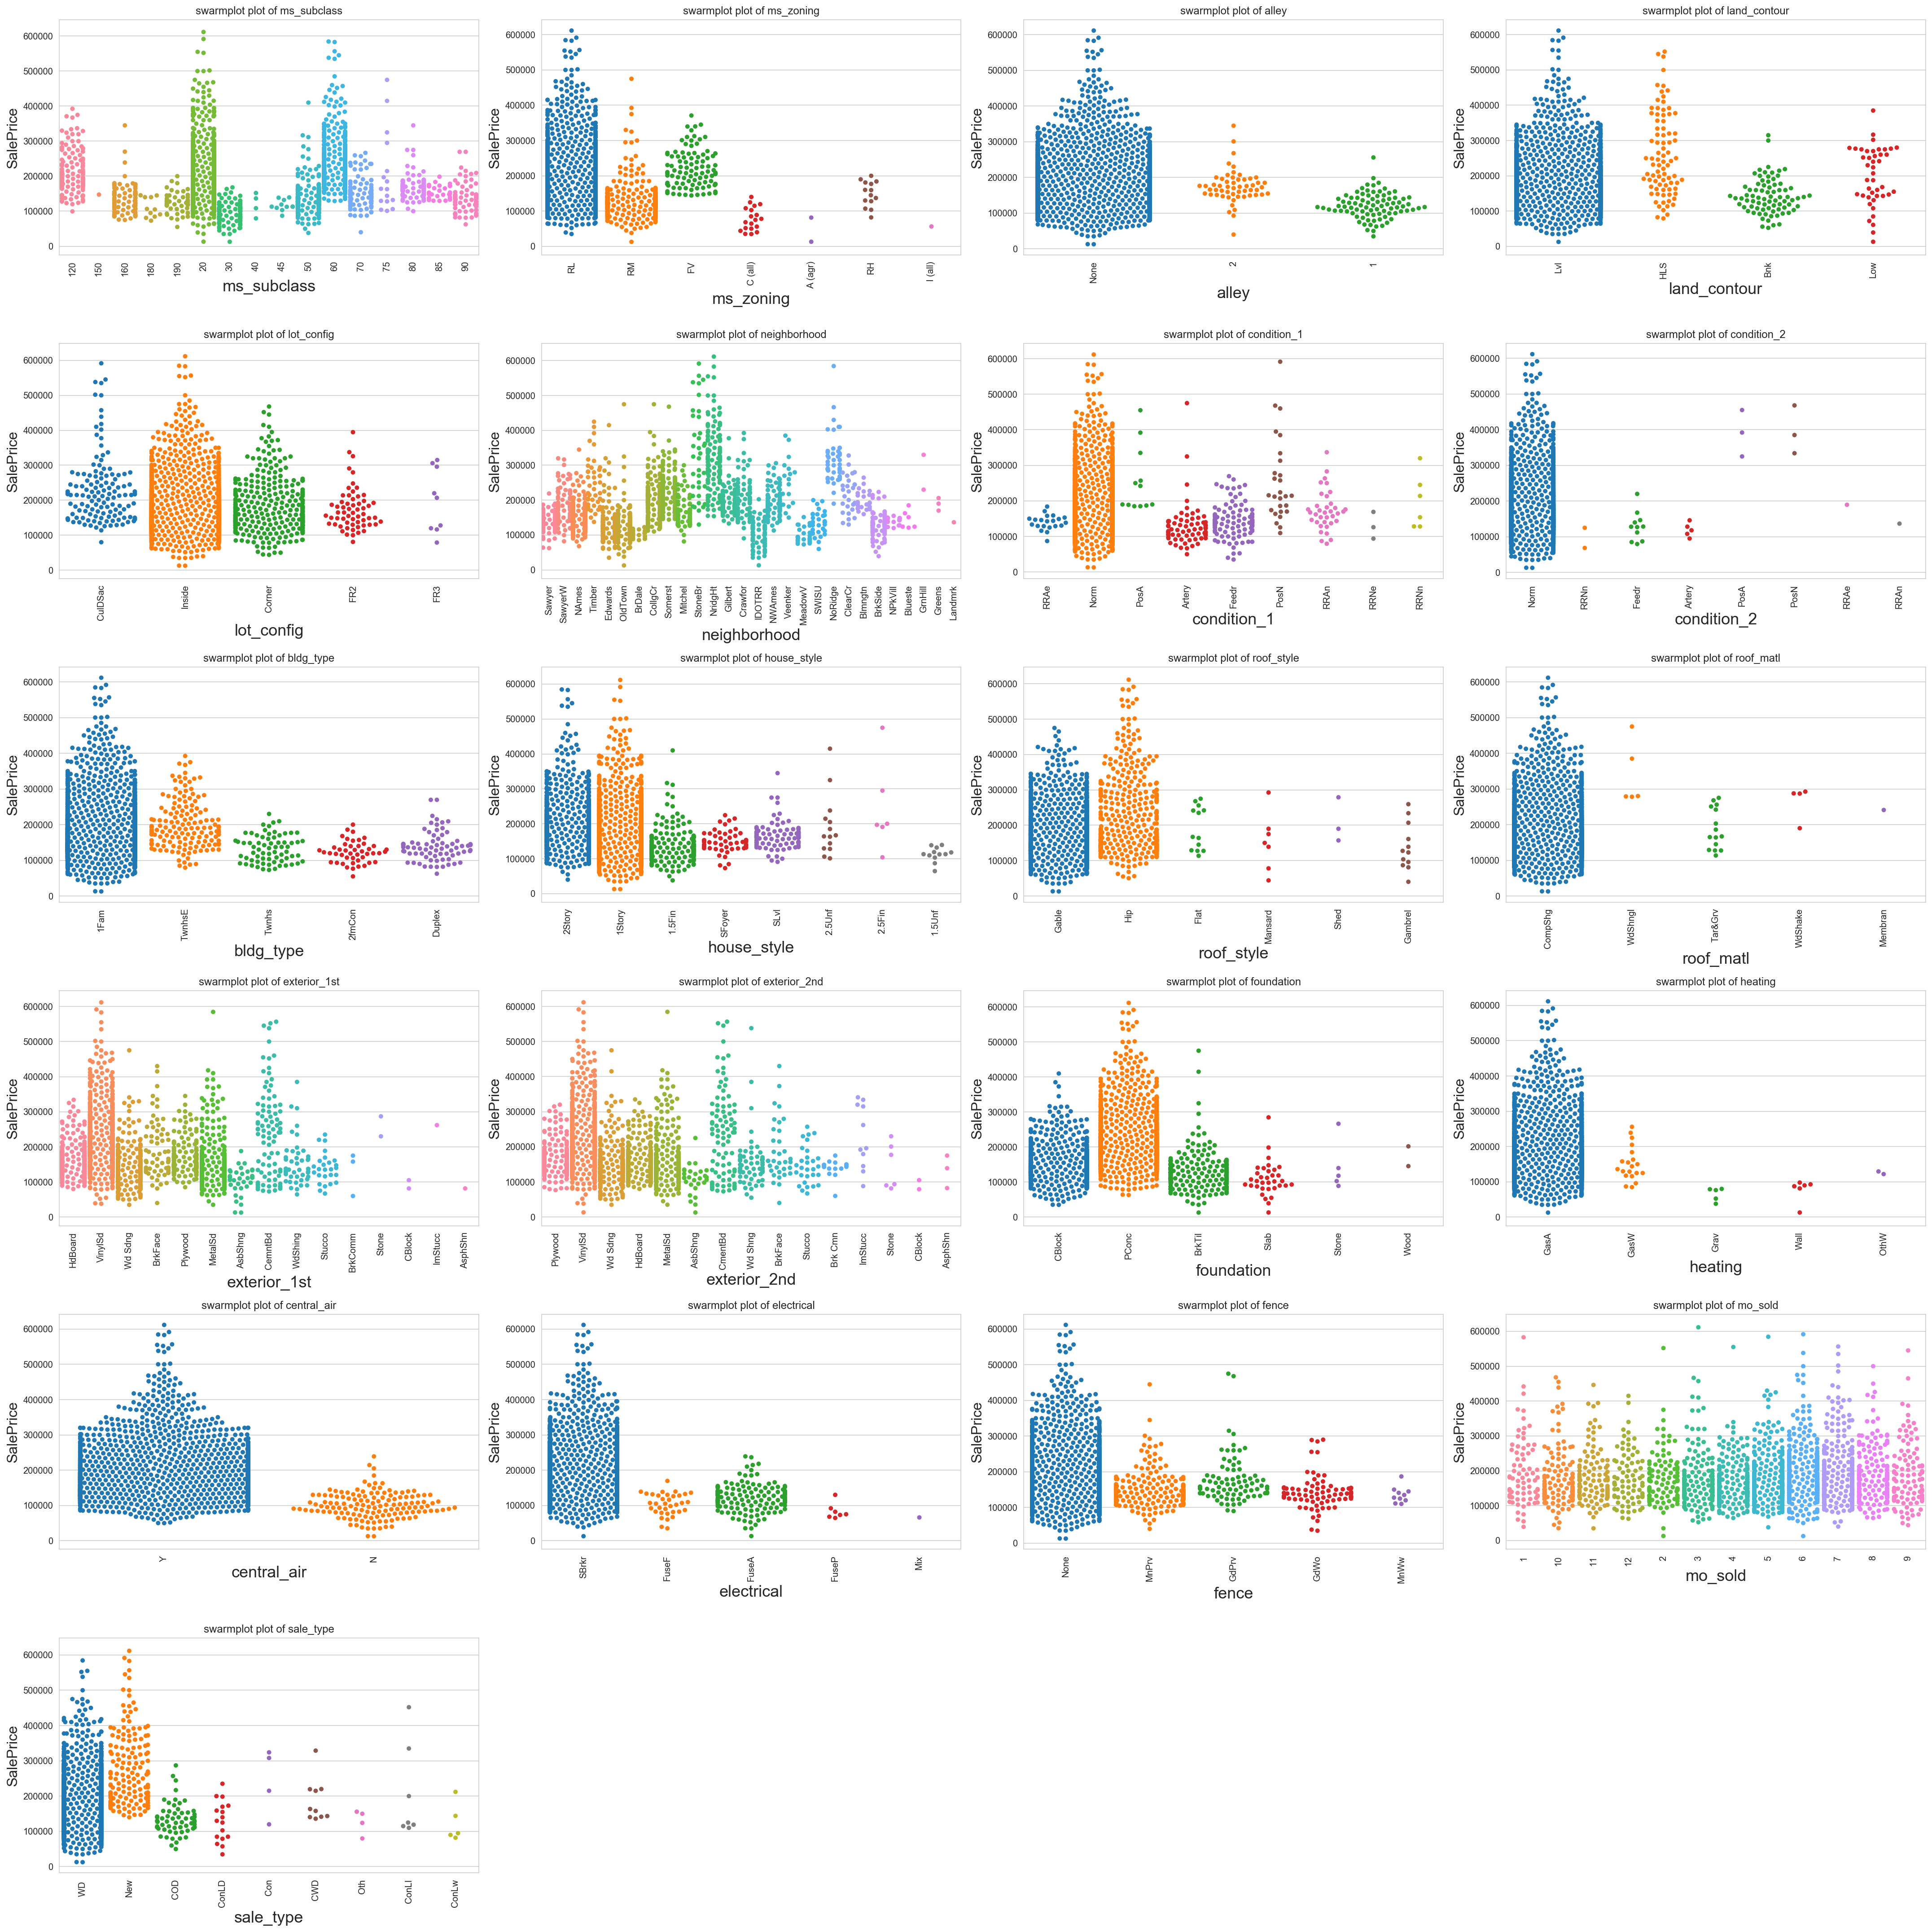

In [94]:
fig = plt.figure(figsize=(30,30))
for i, v in enumerate(categories):
    plt.subplot(6,4,i+1)
    sns.swarmplot(x=v, y='saleprice', data=df_train)
    plt.title('swarmplot plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('SalePrice', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout()

From the swarmplot above, we can identify columns which is highly skewed. (e.g. Roof material, ceentral air, Alley. Ideally, it is a good indicator which does not make a good predictor for sale price.

In [95]:
cate = [x for x in df_test.select_dtypes(include='object').columns]

In [96]:
len(cate)

22

In [97]:
s_cat_train=set(categories)
s_cat_test=set(cate)

In [98]:
#shape of object catergories is different.
diff=list(s_cat_test.difference(s_cat_train))
diff

['bsmt_cond']

In [99]:
#recast this variable to interger
df_test.bsmt_cond=df_test.bsmt_cond.astype(int)

In [100]:
df_test.bsmt_cond.dtype

dtype('int64')

In [101]:
categories = [x for x in df_train.select_dtypes(include='object').columns]
cate = [x for x in df_test.select_dtypes(include='object').columns]

In [102]:
df_train = pd.get_dummies(df_train,drop_first=True,columns=categories)
df_test = pd.get_dummies(df_test,drop_first=True,columns=cate)


In [103]:
print(df_train.shape)
print(df_test.shape)

(2047, 197)
(879, 187)


In [104]:
# store saleprice into another df
df_saleprice=df_train[['id','saleprice']]

In [105]:
#validate
df_saleprice.head()

id  saleprice
0  109     130500
1  544     220000
2  153     109000
3  318     174000
4  255     138500

Since there is a discrepancies in columns size, i will take the innner of both data set to train. Alternatively, we can concat the two sets of data together and get dummies to make sure that our variables are consistent. We would expect that the model train to have the same variables.


In [106]:
final_train, final_test=df_train.align(df_test, join='inner', axis=1) 

In [107]:
final_train.shape

(2047, 180)

In [108]:
final_test.shape

(879, 180)

In [109]:
#validate if there is any other columns which are not join
train_cols=set(final_train.columns)
test_cols = set(final_test.columns)
diff_cols = list(train_cols.difference(test_cols))
diff_cols

[]

In [110]:
#merge two dataframe based on ID
final=pd.merge(final_train,df_saleprice, on='id')

In [111]:
final[['id','saleprice']]

id  saleprice
0      109     130500
1      544     220000
2      153     109000
3      318     174000
4      255     138500
...    ...        ...
2042  1587     298751
2043   785      82500
2044   916     177000
2045   639     144000
2046    10     189000

[2047 rows x 2 columns]

In [112]:
#i have commented the saving of file out unless i need them. For code debugging.
final_test.to_csv('../datasets/test_processed.csv',index=False)

In [113]:
final.to_csv('../datasets/train_processed.csv',index=False)